# Table of Contents
 <p><div class="lev1"><a href="#Measure-Dynamic-Functional-Connectivity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Measure Dynamic Functional Connectivity</a></div><div class="lev2"><a href="#Initialize-Environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialize Environment</a></div><div class="lev2"><a href="#Load-CoreData-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load CoreData</a></div><div class="lev2"><a href="#Compute-Functional-Connectivity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compute Functional Connectivity</a></div><div class="lev2"><a href="#Compute-Pearson-Functional-Connectivity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compute Pearson Functional Connectivity</a></div><div class="lev3"><a href="#Run-the-Pipeline-(in-Parallel)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Run the Pipeline (in Parallel)</a></div><div class="lev2"><a href="#Plot-Adjacency-Matrices-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plot Adjacency Matrices</a></div>

# Measure Dynamic Functional Connectivity

## Initialize Environment

In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    
except:
    print 'NOT IPYTHON'

from __future__ import division
from IPython.display import display

import os
import sys
import glob
import json

import numpy as np
import pandas as pd
import scipy.io as io
import h5py
import matplotlib.pyplot as plt

import scipy.stats as stats

path_CoreData = '/Users/akhambhati/Remotes/hoth_research/CoreData/Sync_Cog_Control-Medaglia'
path_PeriphData = '/Users/akhambhati/Remotes/hoth_research/PeriphData/ds-NMF_CogControl'
path_ExpData = path_PeriphData + '/e01-FuncNetw'

for path in [path_CoreData, path_PeriphData, path_ExpData]:
    if not os.path.exists(path):
        print('Path: {}, does not exist'.format(path))
        os.makedirs(path)

## Load CoreData

In [2]:
df_navon = io.loadmat('{}/NavonBlockedSeriesScale125.mat'.format(path_CoreData), struct_as_record=False)
df_stroop = io.loadmat('{}/StroopBlockedSeriesScale125.mat'.format(path_CoreData), struct_as_record=False)

n_subj = 28
n_fix_block = 12
n_tsk_block = 6
n_roi = 262

## Compute Functional Connectivity

### Process Navon

In [41]:
for subj_id in xrange(n_subj):
    proc_item = '{}/Subject_{}.Navon'.format(path_ExpData, subj_id)
    
    adj_rs_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_rs_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_lo_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_lo_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_hi_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_hi_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    
    cnt = 0
    for fix_block in xrange(0, n_fix_block, 2):
        data = np.vstack((np.array(df_navon['data'][subj_id][fix_block+1].NFix, dtype='f'),
                          np.array(df_navon['data'][subj_id][fix_block+2].NFix, dtype='f'))).T        
        adj = np.corrcoef(data)
        adj_rs_pos[cnt, :, :] = stats.threshold(adj, 0)
        adj_rs_neg[cnt, :, :] = stats.threshold(-1*adj, 0)        
        
        cnt += 1
        
    for tsk_block in xrange(n_tsk_block):
        data = np.array(df_navon['data'][subj_id][tsk_block].NS, dtype='f').T
        adj = np.corrcoef(data)
        adj_lo_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_lo_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        
        
        data = np.array(df_navon['data'][subj_id][tsk_block].S, dtype='f').T
        adj = np.corrcoef(data)
        adj_hi_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_hi_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        

    np.savez(proc_item,
             adj_rs_pos = adj_rs_pos,
             adj_rs_neg = adj_rs_neg,
             adj_lo_pos = adj_lo_pos,
             adj_lo_neg = adj_lo_neg,
             adj_hi_pos = adj_hi_pos,
             adj_hi_neg = adj_hi_neg)

### Process Stroop

In [42]:
for subj_id in xrange(n_subj):
    proc_item = '{}/Subject_{}.Stroop'.format(path_ExpData, subj_id)
    
    adj_rs_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_rs_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_lo_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_lo_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_hi_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_hi_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    
    cnt = 0
    for fix_block in xrange(0, n_fix_block, 2):
        data = np.vstack((np.array(df_stroop['data'][subj_id][fix_block+1].SFix, dtype='f'),
                          np.array(df_stroop['data'][subj_id][fix_block+2].SFix, dtype='f'))).T
        adj = np.corrcoef(data)
        adj_rs_pos[cnt, :, :] = stats.threshold(adj, 0)
        adj_rs_neg[cnt, :, :] = stats.threshold(-1*adj, 0)        
        
        cnt += 1
        
    for tsk_block in xrange(n_tsk_block):
        data = np.array(df_stroop['data'][subj_id][tsk_block].IE, dtype='f').T        
        adj = np.corrcoef(data)
        adj_lo_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_lo_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        
        
        data = np.array(df_stroop['data'][subj_id][tsk_block].E, dtype='f').T                
        adj = np.corrcoef(data)
        adj_hi_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_hi_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        

    np.savez(proc_item,
             adj_rs_pos = adj_rs_pos,
             adj_rs_neg = adj_rs_neg,
             adj_lo_pos = adj_lo_pos,
             adj_lo_neg = adj_lo_neg,
             adj_hi_pos = adj_hi_pos,
             adj_hi_neg = adj_hi_neg)

(array([  2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   8.00000000e+00,
          1.20000000e+01,   4.00000000e+00,   1.60000000e+01,
          1.20000000e+01,   1.00000000e+01,   1.80000000e+01,
          3.60000000e+01,   1.20000000e+01,   2.60000000e+01,
          1.60000000e+01,   3.60000000e+01,   2.60000000e+01,
          3.40000000e+01,   3.80000000e+01,   2.80000000e+01,
          2.40000000e+01,   2.80000000e+01,   1.80000000e+01,
          1.40000000e+01,   1.20000000e+01,   1.80000000e+01,
          1.60000000e+01,   8.00000000e+00,   2.00000000e+01,
          1.60000000e+01,   8.00000000e+00,   1.20000000e+01,
          1.80000000e+01,   6.00000000e+00,   1.00000000e+01,
          1.40000000e+01,   1.20000000e+01,   1.00000000e+01,
          1.20000000e+01,   2.80000000e+01,   2.00000000e+01,
          2.20000000e+01,   1.80000000e+01,   4.00000000e+01,
          4.20000000e+01,   3.20000000e+01,   4.80000000e+01,
        

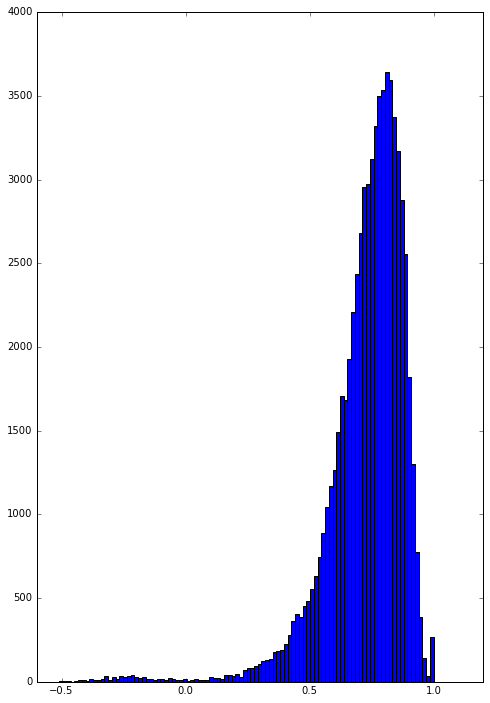

In [47]:
%matplotlib inline

tt = 5
plt.figure(figsize=(8,12))
ax = plt.subplot(1,1,1); 
ax.hist(adj.reshape(-1), 100)

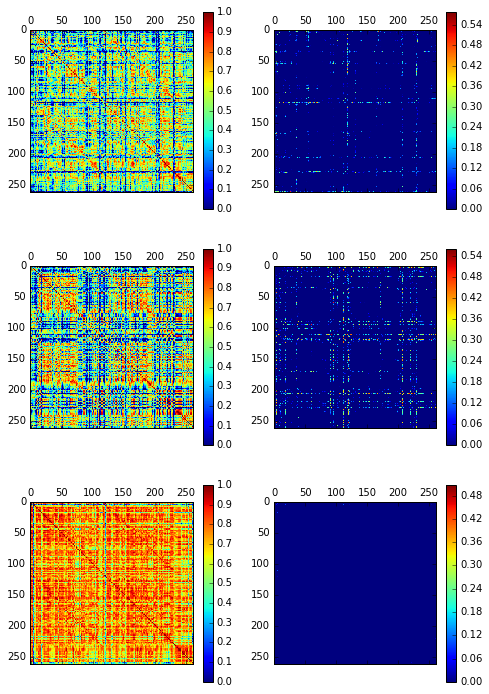

In [46]:
%matplotlib inline

tt = 5
plt.figure(figsize=(8,12))
ax = plt.subplot(3,2,1); mat = ax.matshow(adj_rs_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,2); mat = ax.matshow(adj_rs_neg[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,3); mat = ax.matshow(adj_lo_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,4); mat = ax.matshow(adj_lo_neg[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,5); mat = ax.matshow(adj_hi_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,6); mat = ax.matshow(adj_hi_neg[tt, ...]); plt.colorbar(mat, ax=ax)